# E-commerce Shipping Data
- 제품 배송 시간에 맞춰 배송이 되었는지 예측(binary classification task)

- 주요 feature
    - ID: ID Number of Customers.
    - Warehouse block: The Company have big - Warehouse which is divided in to block such as A,B,C,D,E.
    - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
    - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
    - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
    - Cost of the product: Cost of the Product in US Dollars.
    - Prior purchases: The Number of Prior Purchase.
    - Product importance: The company has categorized the product in the various parameter such as low, medium, high.
    - Gender: Male and Female.
    - Discount offered: Discount offered on that specific product.
    - Weight in gms: It is the weight in grams.
    - **[LABEL] Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


---
- [reference : e-commerce shipping data in KAGGLE](https://www.kaggle.com/datasets/prachi13/customer-analytics)
- 빅분기 2회 실기 기출 데이터셋 이라고 합니다.

# #1 EDA
- 주어진 data를 EDA하고 시각화 해주세요
- 예측에 유의미한 인사이트를 서술해주세요

In [1]:
from pandas import read_csv
X_train = read_csv('./5_data/X_train.csv')
X_test = read_csv('./5_data/X_test.csv')
y_train = read_csv('./5_data/y_train.csv')
y_test = read_csv('./5_data/test_label/y_test.csv')

In [2]:
X_train.describe(include='all')
#총 6598개의 데이터
#범주형 변수: Warehouse_block, Mode_of_Shipment, Customer_care_calls, Product_importance, Gender (5개)
#수치형 변수: Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms (5개)
#ID는 제외

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
count,6598.000000,6598,6598,6598,6598.000000,6598.000000,6598.000000,6598,6598,6598.000000,6598.000000
unique,NaN,5,3,6,NaN,NaN,NaN,3,2,NaN,NaN
top,NaN,F,Ship,4,NaN,NaN,NaN,low,F,NaN,NaN
freq,NaN,2262,4512,2115,NaN,NaN,NaN,3162,3311,NaN,NaN
mean,5476.977266,NaN,NaN,NaN,2.991361,210.393149,3.577751,NaN,NaN,13.353592,3604.191119
std,3172.946154,NaN,NaN,NaN,1.409624,48.258089,1.511394,NaN,NaN,16.187267,1635.697627
min,1.000000,NaN,NaN,NaN,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000
25%,2731.250000,NaN,NaN,NaN,2.000000,170.000000,3.000000,NaN,NaN,4.000000,1834.250000
50%,5476.000000,NaN,NaN,NaN,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4119.500000
75%,8187.750000,NaN,NaN,NaN,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5027.500000


In [3]:
#범주형 변수들의 수준을 확인
#Customer_care_calls의 수준 중 $7이 오기입된 것을 확인함
for col in X_train.columns:
    if X_train[col].dtypes == 'int64':
        continue
    else:
        print(col, "\n", X_train[col].value_counts(), "\n")

Warehouse_block 
 F    2262
B    1116
A    1090
D    1069
C    1061
Name: Warehouse_block, dtype: int64 

Mode_of_Shipment 
 Ship      4512
Flight    1066
Road      1020
Name: Mode_of_Shipment, dtype: int64 

Customer_care_calls 
 4     2115
3     1919
5     1403
6      604
2      404
$7     153
Name: Customer_care_calls, dtype: int64 

Product_importance 
 low       3162
medium    2866
high       570
Name: Product_importance, dtype: int64 

Gender 
 F    3311
M    3287
Name: Gender, dtype: int64 



In [4]:
#Customer_care_calls, Product_importance는 서열척도이기 때문에 수치형 변수로 변환해도 무관할 것으로 예상
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6598 non-null   int64 
 1   Warehouse_block      6598 non-null   object
 2   Mode_of_Shipment     6598 non-null   object
 3   Customer_care_calls  6598 non-null   object
 4   Customer_rating      6598 non-null   int64 
 5   Cost_of_the_Product  6598 non-null   int64 
 6   Prior_purchases      6598 non-null   int64 
 7   Product_importance   6598 non-null   object
 8   Gender               6598 non-null   object
 9   Discount_offered     6598 non-null   int64 
 10  Weight_in_gms        6598 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 567.1+ KB


In [5]:
# 타겟변수: on time 배송된 경우는 1, 그렇지 않은 경우는 0으로 분류되어 있음
y_train['Reached.on.Time_Y.N'].value_counts()

1    3937
0    2661
Name: Reached.on.Time_Y.N, dtype: int64

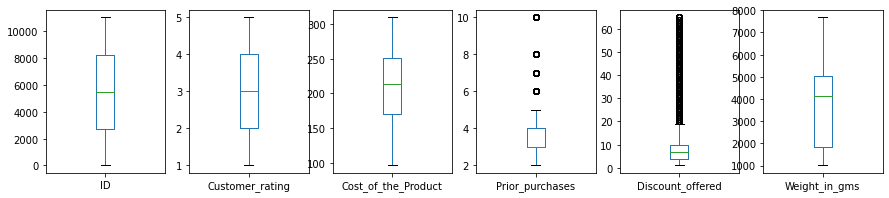

In [6]:
# Prior_purchases와 Discount_offered에서 이상치가 발견됨 -> 합리적인 선의 이상치로 판단됨
from matplotlib import pyplot as plt
X_train.plot(kind='box', subplots=True, figsize=(15,3))
plt.show()

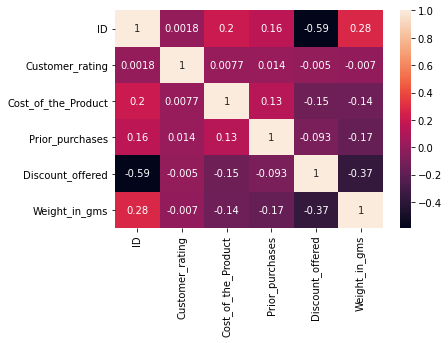

In [7]:
# ID와 Discount_offered의 음의 상관관계가 높아보이는 것을 제외한 나머지는 상관관계가 보이지 않음
import seaborn as sns
sns.heatmap(X_train.corr(), annot=True)
plt.show()

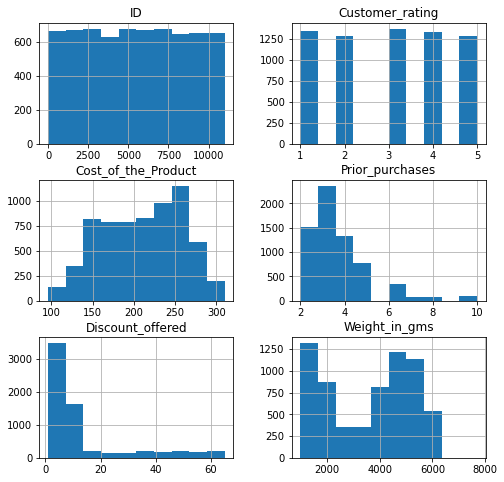

In [8]:
X_train.hist(figsize=(8,8))
plt.show()

# #2 전처리
- 필요한 전처리를 한 후, 처리한 이유를 서술해주세요

In [9]:
#ID는 타겟 예측에 유효한 의미가 없다고 판단되어 feature 삭제
#Customer_care_calls의 수준 중 $7 오기입되어 있는 것을 7로 수정
#Customer_care_calls, Product_importance는 서열척도이기 때문에 수치형 변수로 변환
X_train = X_train.drop('ID', axis=1)

X_train['Customer_care_calls'] = X_train['Customer_care_calls'].replace('$7', '7')

X_train['Customer_care_calls'] = X_train['Customer_care_calls'].astype('int64')

X_train['Product_importance'] = X_train['Product_importance'].replace('high', 3).replace('medium', 2).replace('low', 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      6598 non-null   object
 1   Mode_of_Shipment     6598 non-null   object
 2   Customer_care_calls  6598 non-null   int64 
 3   Customer_rating      6598 non-null   int64 
 4   Cost_of_the_Product  6598 non-null   int64 
 5   Prior_purchases      6598 non-null   int64 
 6   Product_importance   6598 non-null   int64 
 7   Gender               6598 non-null   object
 8   Discount_offered     6598 non-null   int64 
 9   Weight_in_gms        6598 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 515.6+ KB


In [10]:
#범주형 변수 더미코딩
from pandas import get_dummies
X_train2 = get_dummies(X_train, drop_first=True)
X_train2

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M
0,4,3,266,5,3,5,1590,0,0,0,0,0,0,0
1,3,1,174,2,1,44,1556,0,0,0,1,0,1,1
2,4,1,154,10,3,10,5674,0,0,0,1,1,0,1
3,4,3,158,3,2,27,1207,0,0,0,1,0,1,0
4,5,3,175,3,1,7,4833,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,5,2,221,6,2,4,1952,0,0,0,1,1,0,1
6594,4,5,256,3,2,10,4504,0,0,0,1,0,1,1
6595,3,1,217,4,2,1,5761,0,0,0,1,0,1,0
6596,4,5,174,3,2,8,5576,0,0,0,1,1,0,0


# #3 통계분석
- 아래 feature간 통계분석을 자유롭게 수행하고 결과를 서술해주세요
    - Customer rating ~ Reached on time
    - Product importance ~ Customer rating

In [11]:
# Customer rating ~ Reached on time - 상관관계 확인
from scipy.stats import pearsonr, spearmanr
r, p = spearmanr(X_train2['Customer_rating'], y_train['Reached.on.Time_Y.N'])
print('customer rating과 reached on time의 상관계수는 {:.2f}이고, 그 p-value는 {:.2f}이기 때문에 상관계수 자체도 상관이 없는 것으로 나오지만 통계적으로도 의미가 없음'.format(r, p))

customer rating과 reached on time의 상관계수는 0.01이고, 그 p-value는 0.27이기 때문에 상관계수 자체도 상관이 없는 것으로 나오지만 통계적으로도 의미가 없음


In [12]:
# Customer rating ~ Reached on time - 인과관계 확인
# 통계적으로 유의하게 customer rating 변수가 reached on time 변수에 대해 인과관계를 갖는 것으로 나타났으며 데이터의 0.494에 대해 설명력을 갖는 것으로 나타났다.
import statsmodels.api as sm
model = sm.OLS(y_train['Reached.on.Time_Y.N'], X_train2['Customer_rating'])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Reached.on.Time_Y.N   R-squared (uncentered):                   0.494
Model:                             OLS   Adj. R-squared (uncentered):              0.493
Method:                  Least Squares   F-statistic:                              6428.
Date:                 Thu, 05 May 2022   Prob (F-statistic):                        0.00
Time:                         22:42:53   Log-Likelihood:                         -5414.5
No. Observations:                 6598   AIC:                                  1.083e+04
Df Residuals:                     6597   BIC:                                  1.084e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Customer_rating     0.1641      0.002     80.177      0.000       0.160       0.168
==============================================================================
Omnibus:                    12913.591   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.872
Skew:                          -0.293   Prob(JB):                    1.59e-117
Kurtosis:                       1.730   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Product importance ~ Customer rating - 상관관계 확인
r, p = spearmanr(X_train2['Customer_rating'], X_train2['Product_importance'])
print('customer rating과 Product importance의 상관계수는 {:.2f}이고, 그 p-value는 {:.2f}이기 때문에 상관계수 자체도 상관이 없는 것으로 나오지만 통계적으로도 의미가 없음'.format(r, p))

customer rating과 Product importance의 상관계수는 0.01이고, 그 p-value는 0.50이기 때문에 상관계수 자체도 상관이 없는 것으로 나오지만 통계적으로도 의미가 없음


In [14]:
# Product importance ~ Customer rating - 인과관계 확인
# 통계적으로 유의하게 Product importance 변수가 Customer rating 변수에 대해 인과관계를 갖는 것으로 나타났으며 데이터의 0.708에 대해 설명력을 갖는 것으로 나타났다. 회귀계수 1.6075를 봤을 때 product_importance가 높을수록 customer rating이 높아진다.
import statsmodels.api as sm
model = sm.OLS(X_train2['Customer_rating'], X_train2['Product_importance'])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Customer_rating   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                          1.596e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):                        0.00
Time:                        22:42:53   Log-Likelihood:                         -13197.
No. Observations:                6598   AIC:                                  2.640e+04
Df Residuals:                    6597   BIC:                                  2.640e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Product_importance     1.6075      0.013    126.332      0.000       1.583       1.632
==============================================================================
Omnibus:                      244.255   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.885
Skew:                          -0.110   Prob(JB):                     2.52e-26
Kurtosis:                       2.383   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# #4 모델링 및 예측
- 모델링
    - 3가지 모델을 선택해 모델링해주세요.
    - 모델을 선택한 이유를 서술해주세요
- 예측
    - 성능지표를 3가지 선택해 측정해주세요
    - 지표를 선택한 이유를 서술해주세요

In [15]:
X = X_train2
y = y_train['Reached.on.Time_Y.N']

#X_test도 동일한 전처리 진행
X_test = X_test.drop('ID', axis=1)

X_test['Customer_care_calls'] = X_test['Customer_care_calls'].replace('$7', '7')

X_test['Customer_care_calls'] = X_test['Customer_care_calls'].astype('int64')

X_test['Product_importance'] = X_test['Product_importance'].replace('high', 3).replace('medium', 2).replace('low', 1)

X_test = get_dummies(X_test, drop_first=True)

y_test = y_test['Reached.on.Time_Y.N']

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_care_calls    4401 non-null   int64
 1   Customer_rating        4401 non-null   int64
 2   Cost_of_the_Product    4401 non-null   int64
 3   Prior_purchases        4401 non-null   int64
 4   Product_importance     4401 non-null   int64
 5   Discount_offered       4401 non-null   int64
 6   Weight_in_gms          4401 non-null   int64
 7   Warehouse_block_B      4401 non-null   uint8
 8   Warehouse_block_C      4401 non-null   uint8
 9   Warehouse_block_D      4401 non-null   uint8
 10  Warehouse_block_F      4401 non-null   uint8
 11  Mode_of_Shipment_Road  4401 non-null   uint8
 12  Mode_of_Shipment_Ship  4401 non-null   uint8
 13  Gender_M               4401 non-null   uint8
dtypes: int64(7), uint8(7)
memory usage: 270.9 KB


In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X_test = ss.transform(X_test)

In [49]:
#로지스틱 회귀: 신속하고 성능이 좋음
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(X, y)
print("LgisticRegression:")
print("Test set score: {:.3f}, Train set score: {:.3f}".format(LR.score(X_test, y_test), LR.score(X, y)), '\n')

#SVM: 성능이 좋음
from sklearn.svm import SVC
svc = SVC(C=0.1, probability=True)
svc.fit(X, y)
print("SVM:")
print("Test set score: {:.3f}, Train set score: {:.3f}".format(svc.score(X_test, y_test), svc.score(X, y)), '\n')

#RF: 예측 성능이 뛰어남
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3)
rf.fit(X, y)
print("rf:")
print("Test set score: {:.3f}, Train set score: {:.3f}".format(rf.score(X_test, y_test), rf.score(X, y)), '\n')

LgisticRegression:
Test set score: 0.637, Train set score: 0.642 

SVM:
Test set score: 0.649, Train set score: 0.682 

rf:
Test set score: 0.665, Train set score: 0.679 



In [66]:
# liftchart plotting 함수 정의하기
def liftchart(clf, X_train, y_train, X_test, y_test):
    import warnings
    warnings.filterwarnings('ignore')
    from pandas import DataFrame

    prob = clf.predict_proba(X_test)[:,1]
    actual_y = y_test

    # 예측된 확률과 실제 클래스 데이터프래임을 확률 내림차순으로 정렬
    rank = DataFrame({"pred_prob":prob, 'actual_y':actual_y}).sort_values(by='pred_prob', ascending=False).reset_index(drop=True)

    # 10개 구간으로 나눔
    rank['Decile'] = 10
    start=0
    end = len(rank)//10
    end_start=end-start
    decile = 1
    while end < len(rank):
        for i in range(start, end):
            rank['Decile'][i] = decile
        decile += 1
        start = end
        end += len(rank)//10

    # baseline lift 계산 및 실구매자수 집계
    total = len(X_train) #전체 데이터 수
    count = y_train.sum() #1(True)의 개수
    baseline_lift = count/total

    #print("baseline_lift:", baseline_lift)
    liftchart = rank.groupby('Decile').sum()

    # captured response, response, lift 추가
    liftchart['captured_R'] = liftchart['actual_y']/count
    liftchart['R'] = liftchart['actual_y']/total/10 #10=등급수
    liftchart['lift'] = liftchart['R']/baseline_lift

    from matplotlib import pyplot as plt
    plt.bar(liftchart.index, liftchart['lift'])
    plt.title(clf)
    plt.ylabel("lift")
    plt.xlabel('decile')
    return plt.show()

In [58]:
# f1, roc curve, auc 함수 정의하기
def f1_roc_auc(clf, X_train, y_train, X_test, y_test):
    from sklearn.metrics import f1_score, roc_curve, roc_auc_score, auc
    pred = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    f1 = f1_score(y_test, pred) #1에 대한 예측 확률
    fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])
    AUC = auc(fpr, tpr)#roc_auc_score(y_test, proba[:, 1])
    plt.plot(fpr, tpr, label="AUC %.2f"%AUC)
    plt.text(0.8,0, "F1 score: %.2f"%f1)
    plt.legend()
    plt.title(clf)
    plt.plot([0,1], [0,1], linestyle='dashed')
    return plt.show()

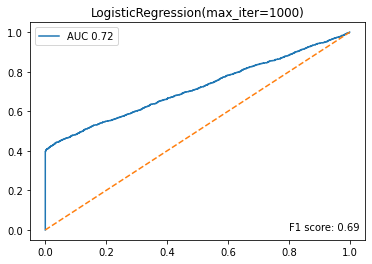

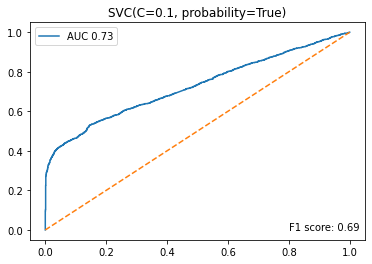

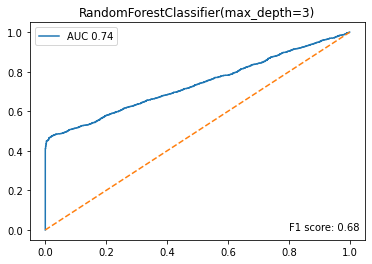

In [59]:
#F1 score: precision과 sensitivity를 모두 고려하여 균형있게 분류 성능을 판단할 수 있음
#ROC curve & AUC: FPR, TPR의 추이에 따른 분류 성능을 확인할 수 있고, AUC의 경우 0~1 사이로 성능을 평가하기 때문에 다른 분류기의 성능과 비교하기 쉬움
#lift chart: 막대 그래프 시각화를 통해 직관적으로 성능을 파악할 수 있음
for clf, ax in zip([LR, svc, rf], axes):
    f1_roc_auc(clf, X, y, X_test, y_test)

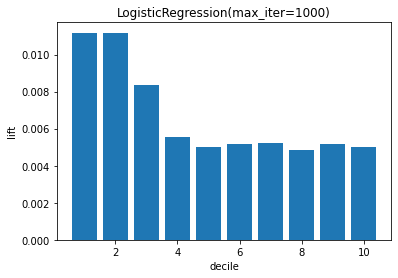

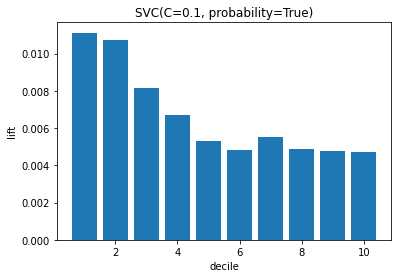

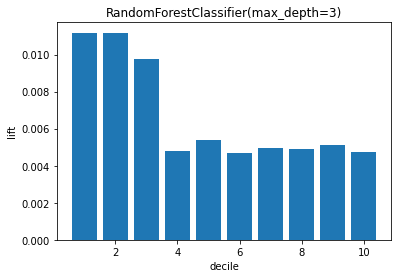

In [67]:
for clf, ax in zip([LR, svc, rf], axes):
    liftchart(clf, X, y, X_test, y_test)

# #5 추가적인 개선 방안
을 서술해주세요

In [ ]:
# 단계적 선택법을 통해 변수 선택 진행
# 오버 샘플링을 통해 클래스 간 불균형 해소 후 모델링
# 영향치, 이상치 제거